Pontifícia Universidade Católica de São Paulo 

`Ciência de Dados e Inteligência Artificial`

## Laboratório 14 - DBSCAN


---
> 👨‍🏫*Professor Dr. Rooney Coelho (rracoelho@pucsp.br)*
---

A maioria das técnicas tradicionais de agrupamento, como k-means, agrupamento hierárquico e agrupamento difuso, podem ser usadas para agrupar dados sem supervisão.

No entanto, quando aplicadas a tarefas com clusters de formato arbitrário, ou clusters dentro de cluster, as técnicas tradicionais podem não conseguir bons resultados. Ou seja, os elementos no mesmo cluster podem não compartilhar similaridade suficiente ou o desempenho pode ser ruim.
Além disso, o agrupamento baseado em densidade localiza regiões de alta densidade que são separadas umas das outras por regiões de baixa densidade. Densidade, neste contexto, é definida como o número de pontos dentro de um raio especificado.



### Modelagem
DBSCAN significa Density-Based Spatial Clustering of Applications with Noise (Agrupamento Espacial Baseado em Densidade de Aplicativos com Ruído). Esta técnica é um dos algoritmos de agrupamento mais comuns que funciona com base na densidade do objeto.
A ideia é que, se um determinado ponto pertence a um cluster, ele deve estar próximo a muitos outros pontos desse cluster.

Funciona com base em dois parâmetros: Epsilon e Pontos Mínimos
__Epsilon__ determina um raio especificado que, se incluir um número suficiente de pontos, chamamos de área densa
__minimumSamples__ determinam o número mínimo de pontos de dados que queremos em uma vizinhança para definir um cluster.

In [1]:
import numpy as np 
import pandas as pd

from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 

from mpl_toolkits.basemap import Basemap

import warnings

warnings.filterwarnings('ignore')

C:\Users\lucas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Agrupamento de estações meteorológicas usando DBSCAN e scikit-learn

DBSCAN é especialmente muito bom para tarefas como identificação de classes em um contexto espacial. O atributo maravilhoso do algoritmo DBSCAN é que ele pode descobrir qualquer cluster de forma arbitrária sem ser afetado pelo ruído. Por exemplo, este exemplo a seguir agrupa a localização das estações meteorológicas no Canadá.

O DBSCAN pode ser usado aqui, por exemplo, para encontrar o grupo de estações que apresentam a mesma condição meteorológica. Como você pode ver, ele não apenas encontra diferentes clusters de formas arbitrárias, mas também pode encontrar a parte mais densa de amostras centradas em dados, ignorando áreas ou ruídos menos densos.

vamos começar a brincar com os dados. Estaremos trabalhando de acordo com o seguinte fluxo de trabalho: 

1. Carregando dados
2. Dados de visão geral
3. Limpeza de dados
4. Seleção de dados
5. Agrupamento

### Sobre o conjunto de dados

		
<h4 align = "center">
Meio Ambiente Canadá
Valores Mensais de Julho - 2015
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Nome na tabela</th>
     <th>Significado</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "blue">Tx</font></td>
    <td><font color = "blue">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "blue">Tn</font></td>
    <td><font color = "blue">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>

 

### Carregar o Dataset

Vamos importar o .csv e depois criar as colunas para ano, mês e dia.

In [2]:
pdf = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv')
pdf

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,NAIN A,56.550,-61.683,NL,-22.6,0.0,-5.2,-6.8,0.0,-33.5,...,0.0,66.0,74.0,5.0,NaN,NaN,NaN,1136.5,0.0,8502800
1337,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,17.0,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801
1338,SAGLEK,58.333,-62.586,NL,-24.4,2.0,NaN,-13.5,1.0,-32.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1101.2,0.0,8503249
1339,TUKIALIK BAY,54.716,-58.358,NL,-22.8,2.0,NaN,-5.8,1.0,-32.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1060.0,0.0,8503992


### Limpeza

Remova as linhas que não possuem nenhum valor no campo __Tm__.

In [3]:
pdf.dropna(subset=['Tm'], inplace=True)

### Visualização

Visualização de estações no mapa usando o pacote basemap. O kit de ferramentas de mapa base matplotlib é uma biblioteca para plotar dados 2D em mapas em Python. O Basemap não faz nenhuma plotagem por conta própria, mas fornece as facilidades para transformar coordenadas em projeções de mapa.

Observe que o tamanho de cada ponto de dados representa a média da temperatura máxima para cada estação em um ano.

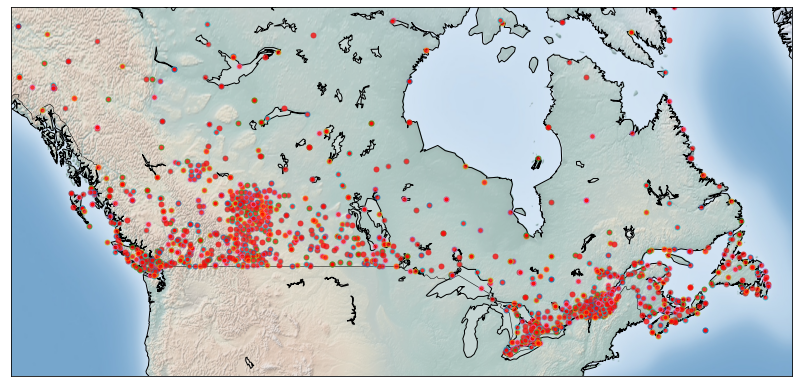

In [4]:
llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

plt.figure(figsize=(14,10))
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# Para coletar dados com base em estações   
xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualização
for index,row in pdf.iterrows():
   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym, markerfacecolor = 'red',  marker='o', markersize= 5, alpha = 0.75)
plt.show()

### Agrupamento de estações com base em sua localização, ou seja, Lat & Lon

A biblioteca __DBSCAN__ do sklearn pode executar clustering DBSCAN a partir de uma matriz vetorial ou matriz de distância. No nosso caso, passamos o array Numpy `Clus_dataSet` para encontrar amostras centrais de alta densidade e expandir os clusters a partir delas.

Tendo como base `xm` e `ym`, crie um Dataset chamado `Clus_dataSet`. Faça a padronização dos dados através do StandardScaler e calcule o DBSCAN para este Dataset.

```python
eps=0.15 
min_samples=10
```

Depois de processado, crie uma coluna chamada `Clus_Db` para informar a numeração do cluster.


In [5]:
raw_pdf = pdf.copy()
pdf.drop(['Stn_Name', 'D', 'S', 'DwS', 'S%N', 'P%N', 'S_G', 'BS', 'DwBS', 'BS%', 'Stn_No'], axis=1, inplace=True)
pdf.dropna(axis=0, inplace=True)

In [6]:
Clus_dataSet = pdf.copy()
Clus_dataSet.head()

,Lat,Long,Prov,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD,xm,ym
0,48.935,-123.742,BC,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0,1.807806e+06,1.396332e+06
1,48.824,-124.133,BC,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0,1.764329e+06,1.377564e+06
2,48.829,-124.052,BC,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0,1.773336e+06,1.378409e+06
4,48.735,-123.728,BC,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0,1.809363e+06,1.362546e+06
5,48.432,-123.439,BC,8.8,0.0,13.1,0.0,1.9,0.0,81.0,8.0,12.0,258.6,0.0,1.841498e+06,1.311615e+06


In [7]:
Clus_dataSet.shape

(1098, 16)

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [9]:
cat_cols = ['Prov']
num_cols = ['Lat', 'Long', 'Tm', 'DwTm', 'Tx', 'DwTx', 'Tn', 'DwTn', 'P', 'DwP', 'Pd',
       'HDD', 'CDD', 'xm', 'ym']

In [10]:
preprocessing = ColumnTransformer(transformers=[
    ('encoding', OneHotEncoder(sparse=False), cat_cols),
    ('scaling', StandardScaler(), num_cols),
])

In [11]:
Clus_dataSet_processed = preprocessing.fit_transform(Clus_dataSet)

In [12]:
new_cols = pd.Series(preprocessing.get_feature_names_out()).apply(lambda x: x.split('__')[1])

In [13]:
Clus_dataSet_processed = pd.DataFrame(Clus_dataSet_processed, columns=new_cols)
Clus_dataSet_processed

,Prov_AB,Prov_BC,Prov_MB,Prov_NB,Prov_NL,Prov_NS,Prov_NT,Prov_NU,Prov_ON,Prov_PE,...,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD,xm,ym
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439545,2.101888,-0.426963,1.998607,-0.539307,0.920264,-1.575749,0.0,-1.149366,-0.317280
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439545,1.781550,-0.426963,3.255578,-0.539307,0.920264,-1.461411,0.0,-1.166317,-0.341558
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.705436,1.821592,1.654560,3.350087,1.425098,0.706638,-1.932674,0.0,-1.162805,-0.340466
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.037117,1.941719,0.035598,1.834791,-0.102772,0.706638,-1.594749,0.0,-1.148759,-0.360986
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.439545,2.173964,-0.426963,0.458109,1.206831,0.920264,-1.625624,0.0,-1.136231,-0.426872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.439545,-0.645008,-0.426963,3.701345,1.861633,1.988394,1.284058,0.0,1.604551,1.215065
1094,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.513780,-0.460814,0.498158,-0.675999,0.333762,-1.215994,0.329997,0.0,1.793954,0.446735
1095,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.439545,-0.653016,-0.426963,-0.257009,-0.539307,-0.361491,1.366503,0.0,1.540997,1.498049
1096,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.439545,-0.661025,-0.426963,-0.083743,-0.539307,-0.575117,1.352932,0.0,1.540997,1.498049


In [14]:
Clus_dataSet_processed_v1 = Clus_dataSet_processed[['xm', 'ym']]

In [15]:
dbscan_model = DBSCAN(eps=0.15 , min_samples=10)

In [16]:
%time
y_pred = dbscan_model.fit_predict(Clus_dataSet_processed_v1)

Wall time: 0 ns


Escreve um código para mostrar os valores únicos para a numeração dos clusters.

In [17]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

Como você pode ver para outliers, o rótulo do cluster é -1

In [18]:
Clus_dataSet = Clus_dataSet_processed_v1
Clus_dataSet['Clus_Db'] = y_pred
pdf['Clus_Db'] = y_pred

### Visualização de clusters com base na localização

Agora, podemos visualizar os clusters usando o base map:

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit_transform(Clus_dataSet)

array([[-1.14936635, -0.31727967, -0.55901905],
       [-1.16631687, -0.34155846, -0.55901905],
       [-1.16280538, -0.34046598, -0.55901905],
       ...,
       [ 1.54099694,  1.49804882, -1.16674471],
       [ 1.54099694,  1.49804882, -1.16674471],
       [ 1.31634842,  0.59361667, -1.16674471]])

In [21]:
clusterNum = len(np.unique(y_pred))
labels = np.unique(y_pred)

Cluster 0, Avg Temp: -5.401226993865034
Cluster 1, Avg Temp: 0.5566666666666664
Cluster 2, Avg Temp: -9.56
Cluster 3, Avg Temp: -15.358610271903316
Cluster 4, Avg Temp: -9.169565217391304
Cluster 5, Avg Temp: -4.970000000000001


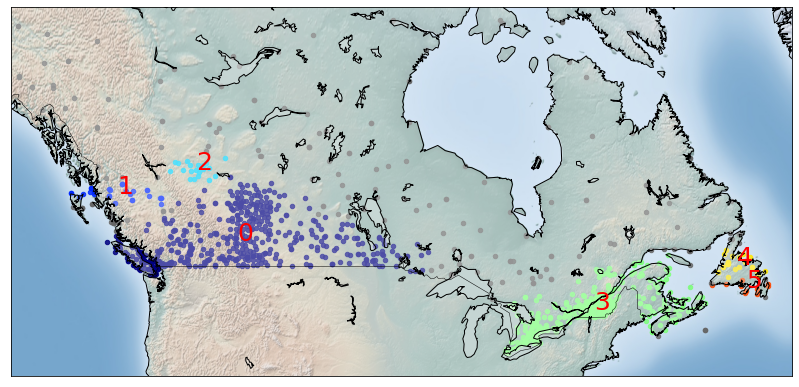

In [22]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)


plt.figure(figsize=(14,10))
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))

### Agrupamento de estações com base em sua localização, temperatura média, máxima e mínima

Executamos novamente o DBSCAN, mas desta vez em um conjunto de dados de 5 dimensões.

Use as colunas `'xm','ym','Tx','Tm','Tn'` do DataFrame original e ajuste o DBSCAN para: 

```python
eps=0.15, min_samples=10
```

In [23]:
dbscan_model = DBSCAN(eps=0.15 , min_samples=10)

In [24]:
Clus_dataSet_processed_v2 = Clus_dataSet_processed[['xm','ym','Tx','Tm','Tn']]

In [25]:
%time
y_pred = dbscan_model.fit_predict(Clus_dataSet_processed_v2)

Wall time: 0 ns


In [26]:
np.unique(y_pred)

array([-1,  0,  1,  2,  3], dtype=int64)

### Visualização de clusters com base na localização e temperatura

Ajuste o código da figura anterior para ter o que se pede.

In [27]:
Clus_dataSet = Clus_dataSet_processed_v2
Clus_dataSet['Clus_Db'] = y_pred
pdf['Clus_Db'] = y_pred

In [28]:
clusterNum = len(np.unique(y_pred))
labels = np.unique(y_pred)

Cluster 0, Avg Temp: 8.420000000000002
Cluster 1, Avg Temp: 7.784615384615386
Cluster 2, Avg Temp: -15.594444444444443
Cluster 3, Avg Temp: -17.486666666666665


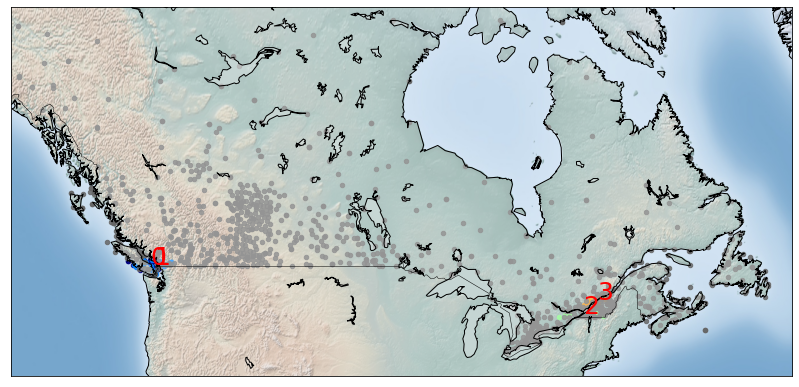

In [29]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)


plt.figure(figsize=(14,10))
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Avg Temp: '+ str(np.mean(clust_set.Tm)))